In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import re
import plotly.express as px

#READ THE DATA FRAME
mental_health = pd.read_csv ('/Users/queraltiglesias/Desktop/Data/Projects/project-2/project2/survey.csv',encoding='unicode_escape')



In [2]:
#DATA

In [3]:
url = "https://www.worldometers.info/gdp/gdp-by-country/"

In [4]:
html = requests.get(url)
html

<Response [200]>

In [5]:
#HTML CONTENT

In [6]:
soup = BeautifulSoup(html.content, "html.parser")

In [7]:
type(soup)

bs4.BeautifulSoup

In [8]:
soup.title.string

'GDP by Country - Worldometer'

In [9]:
soup


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--> <html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>GDP by Country - Worldometer</title><meta content="Countries in the world ranked by Gross Domestic Product (GDP). List and ranking of GDP growth, GDP per capita and couuntry share of World's GDP" name="description"/><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/><link href="/favicon/apple-icon-114x114.

In [10]:
#WEB SCRAPING (TABLE)
c = pd.read_html(html.content)

In [11]:
country=c[0]

In [12]:
country

,#,Country,"GDP (nominal, 2017)",GDP (abbrev.),GDP growth,Population (2017),GDP per capita,Share of World GDP
0,1,United States,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756,"$59,939",24.08%
1,2,China,"$12,237,700,479,375",$12.238 trillion,6.90%,1421021791,"$8,612",15.12%
2,3,Japan,"$4,872,415,104,315",$4.872 trillion,1.71%,127502725,"$38,214",6.02%
3,4,Germany,"$3,693,204,332,230",$3.693 trillion,2.22%,82658409,"$44,680",4.56%
4,5,India,"$2,650,725,335,364",$2.651 trillion,6.68%,1338676785,"$1,980",3.28%
...,...,...,...,...,...,...,...,...
185,186,Micronesia,"$336,427,500",$336 million,3.20%,532899,$631,0.00%
186,187,Palau,"$289,823,500",$290 million,-3.57%,17808,"$16,275",0.00%
187,188,Marshall Islands,"$204,173,430",$204 million,3.60%,58058,"$3,517",0.00%
188,189,Kiribati,"$185,572,502",$186 million,0.33%,114158,"$1,626",0.00%


In [13]:
#MERGE COLUMNS COUNTRY VS COUNTRY FROM DIFERENT DATA FRAME
df = pd.merge(mental_health, country, on=["Country"], how="left")

df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_vs_physical,obs_consequence,comments,#,"GDP (nominal, 2017)",GDP (abbrev.),GDP growth,Population (2017),GDP per capita,Share of World GDP
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Yes,No,NaN,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,No,NaN,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,No,NaN,10.0,"$1,647,120,175,449",$1.647 trillion,3.05%,36732095.0,"$44,841",2.04%
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,No,Yes,NaN,6.0,"$2,637,866,340,434",$2.638 trillion,1.79%,66727461.0,"$39,532",3.26%
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,NaN,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Don't know,No,NaN,6.0,"$2,637,866,340,434",$2.638 trillion,1.79%,66727461.0,"$39,532",3.26%
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,No,NaN,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,No,No,NaN,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,No,No,NaN,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%


In [14]:
#type of plots
sns.set_theme(style='white', palette='Spectral')

In [15]:
mental_health.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [16]:
#Dates that are in the data frame
mental_health.shape

(1259, 27)

In [17]:
mental_health.dropna(how='all',inplace=True)

In [18]:
#NUMBER OF SAMPLES WE WANT TO SHOW

mental_health.sample(500)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1010,2014-08-29 09:47:10,40,male,United States,TN,No,No,No,NaN,More than 1000,...,Don't know,Maybe,No,No,Yes,No,No,Don't know,No,NaN
894,2014-08-28 17:39:06,40,M,United States,TN,No,Yes,Yes,Often,500-1000,...,Don't know,Maybe,Maybe,Some of them,Some of them,No,Yes,Don't know,No,Bipolar spectrum is tricky.
977,2014-08-29 08:53:19,27,Male,France,NaN,No,Yes,No,NaN,500-1000,...,Somewhat easy,Maybe,Maybe,No,Some of them,No,Maybe,Don't know,Yes,NaN
710,2014-08-28 10:02:45,34,Male,United Kingdom,NaN,No,No,No,NaN,6-25,...,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,Maybe,Don't know,No,NaN
726,2014-08-28 10:20:37,21,male,Germany,NaN,No,No,No,Rarely,6-25,...,Very easy,Maybe,Maybe,Some of them,Some of them,No,Maybe,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2014-08-27 12:20:10,33,Male,United States,WI,No,Yes,Yes,Sometimes,26-100,...,Somewhat easy,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
1152,2014-09-02 08:00:33,38,Male,Canada,NaN,No,Yes,Yes,Rarely,100-500,...,Don't know,No,No,Yes,Yes,No,Maybe,No,No,NaN
749,2014-08-28 11:15:42,19,Male,Canada,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,Yes,Don't know,No,NaN
1250,2015-07-27 23:25:34,30,Male,United States,CA,Yes,Yes,Yes,Often,26-100,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN


In [19]:
mental_health.drop(['supervisor','comments', 'state','Timestamp', 'self_employed',"phys_health_consequence", 'coworkers', 'mental_health_interview',
       'phys_health_interview', 'mental_health_consequence', 'mental_vs_physical',
       'obs_consequence'],axis=1,inplace=True)

In [20]:
mental_health.columns

Index(['Age', 'Gender', 'Country', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave'],
      dtype='object')

In [21]:
mental_health[ 'Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [22]:
mental_health.columns

Index(['Age', 'Gender', 'Country', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave'],
      dtype='object')

In [23]:
#Graphhic 1

In [24]:
mental_health['Gender']

0       Female
1            M
2         Male
3         Male
4         Male
         ...  
1254      male
1255      Male
1256      male
1257         f
1258      Male
Name: Gender, Length: 1259, dtype: object

In [25]:
condtion = ((mental_health[ 'Gender']=="Male") | (mental_health[ 'Gender']=="Female"))

In [26]:
mental_health = mental_health[condtion]

In [27]:
mental_health[ 'Gender'].unique()

array(['Female', 'Male'], dtype=object)

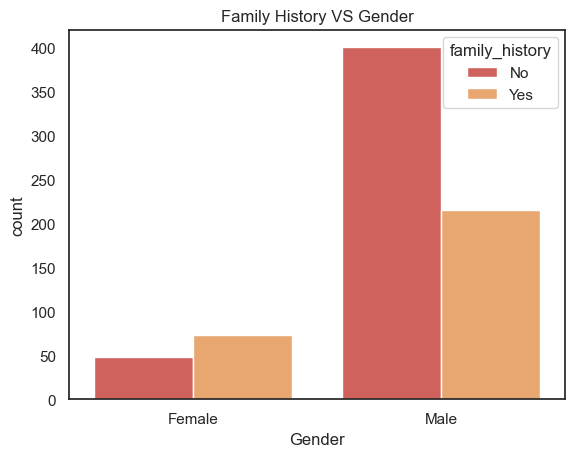

In [28]:
sns.countplot(data=mental_health, x= 'Gender', hue= 'family_history')
dtype={'caption' : str}
plt.title("Family History VS Gender")
plt.savefig("familyhistory.png")


In [29]:
df = pd.merge(mental_health, country, on=["Country"], how="left")
df

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,seek_help,anonymity,leave,#,"GDP (nominal, 2017)",GDP (abbrev.),GDP growth,Population (2017),GDP per capita,Share of World GDP
0,37,Female,United States,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Yes,Somewhat easy,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
1,32,Male,Canada,No,No,Rarely,6-25,No,Yes,No,...,No,Don't know,Somewhat difficult,10.0,"$1,647,120,175,449",$1.647 trillion,3.05%,36732095.0,"$44,841",2.04%
2,31,Male,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,...,No,No,Somewhat difficult,6.0,"$2,637,866,340,434",$2.638 trillion,1.79%,66727461.0,"$39,532",3.26%
3,31,Male,United States,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,Don't know,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
4,33,Male,United States,Yes,No,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,Don't know,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,30,Male,United States,Yes,Yes,Often,26-100,No,Yes,Yes,...,Yes,Don't know,Don't know,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
732,36,Male,South Africa,Yes,Yes,Often,100-500,No,No,No,...,No,Don't know,Somewhat easy,32.0,"$348,871,647,960",$349 billion,1.32%,57009756.0,"$6,120",0.43%
733,36,Male,United States,Yes,No,Rarely,More than 1000,No,No,Don't know,...,Yes,Don't know,Somewhat easy,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
734,32,Male,United States,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,No,Yes,Somewhat difficult,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%


In [30]:
country_count = df['Country'].value_counts()
country_50 = country_count[country_count > 10]
print(country_50)

United States     430
United Kingdom    130
Canada             47
Netherlands        15
Australia          15
Ireland            14
Germany            12
Name: Country, dtype: int64


In [31]:
countries = country_count[country_count > 10].index

In [32]:
df_countries = df[df.Country.isin(countries)].copy()

In [33]:
df_countries.to_csv(r'df.csv', index = False)

In [34]:
df.head()

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,seek_help,anonymity,leave,#,"GDP (nominal, 2017)",GDP (abbrev.),GDP growth,Population (2017),GDP per capita,Share of World GDP
0,37,Female,United States,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Yes,Somewhat easy,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
1,32,Male,Canada,No,No,Rarely,6-25,No,Yes,No,...,No,Don't know,Somewhat difficult,10.0,"$1,647,120,175,449",$1.647 trillion,3.05%,36732095.0,"$44,841",2.04%
2,31,Male,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,...,No,No,Somewhat difficult,6.0,"$2,637,866,340,434",$2.638 trillion,1.79%,66727461.0,"$39,532",3.26%
3,31,Male,United States,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,Don't know,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%
4,33,Male,United States,Yes,No,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,Don't know,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756.0,"$59,939",24.08%


In [35]:
#Graphic 2

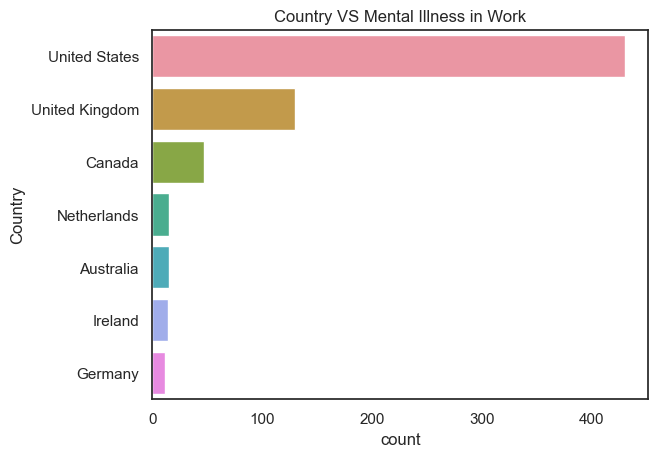

In [36]:
sns.countplot(y=df_countries["Country"], order = (df_countries['Country'].value_counts().index))
plt.title("Country VS Mental Illness in Work")
plt.savefig("country_attacks.png")

In [37]:
df.columns

Index(['Age', 'Gender', 'Country', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', '#', 'GDP (nominal, 2017)', 'GDP (abbrev.)',
       'GDP growth', 'Population (2017)', 'GDP per capita',
       'Share of World GDP'],
      dtype='object')

In [38]:
#Graphic 3

United States     430
United Kingdom    130
Canada             47
Netherlands        15
Australia          15
Ireland            14
Germany            12
Name: Country, dtype: int64


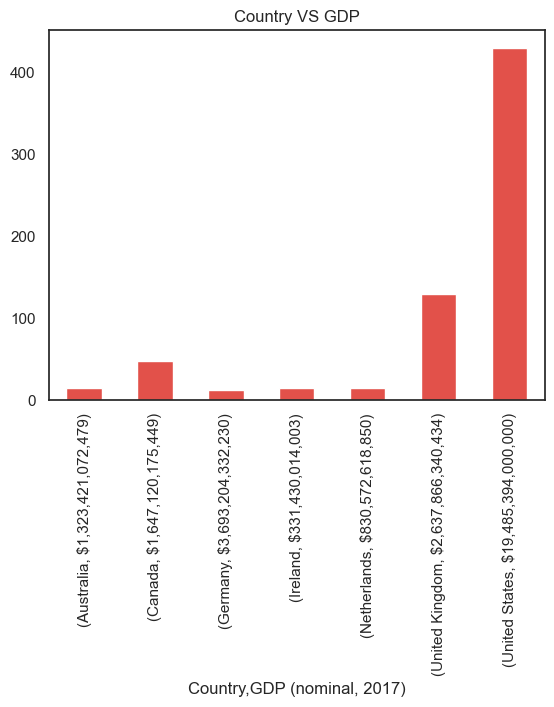

In [39]:
country_count = df[ "Country"].value_counts()
country_50 = country_count[country_count > 10]
print(country_50)

countries = country_count[country_count > 10].index
df_countries = df[df.Country.isin(countries)].copy()
df_countries.to_csv(r'df.csv', index = False)

df_countries=df_countries.groupby([ "Country","GDP (nominal, 2017)"]).size()

df_countries.plot(kind='bar')
plt.title("Country VS GDP")
plt.savefig("mental_ilness.png")

In [40]:
#Graphic 4

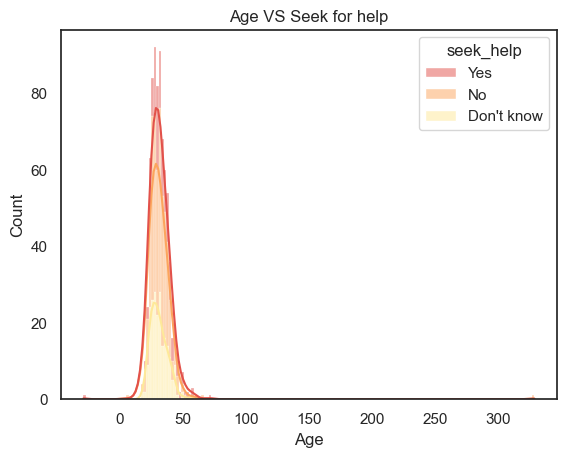

In [41]:
df1= df[(df["Age"]<=90)]
sns.histplot(data=df, x="Age", hue= 'seek_help', multiple='stack', kde=True)
plt.title("Age VS Seek for help")
plt.savefig("seekforhelp.png")